<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

In [1]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib: Basic Plotting, Part 1

Lets pick a country and an indicator to explore CO2 Emissions per capita and the USA

In [2]:
data = pd.read_csv("Indicators.csv")

In [3]:
#set up 2 masks
hist_idicator =  "CO2 emissions \(metric"
hist_country= "USA"

mask1 = data["IndicatorName"].str.contains(hist_idicator)
mask2 = data["CountryCode"].str.contains(hist_country)

#State is just those indicators matching the USA for country code  an
stage = data[mask1 & mask2]

In [4]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


# Lets see how emissions have changed over time using Matplotlib

# Bar plot

<function matplotlib.pyplot.show>

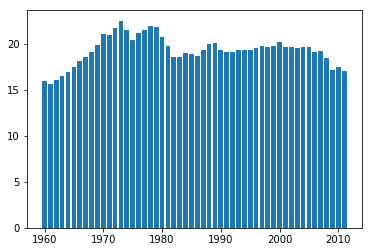

In [5]:
# get the years
years = stage["Year"].values
# get the values
co2= stage["Value"].values

# Create a plot
plt.bar(years,co2)
plt.show

# Line plot

Switch to a Line Plot

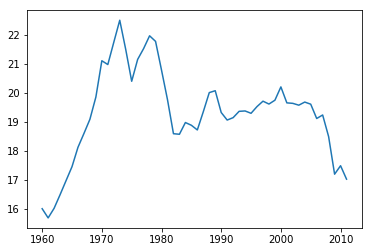

In [6]:
plt.plot(years,co2)

Label the axes

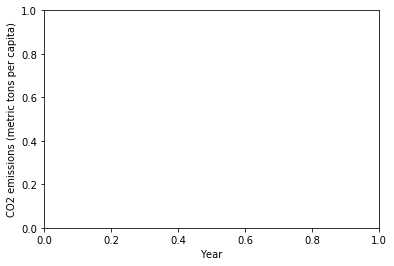

In [7]:
plt.xlabel("Year")
plt.ylabel(stage["IndicatorName"].iloc[0])

Label the figure

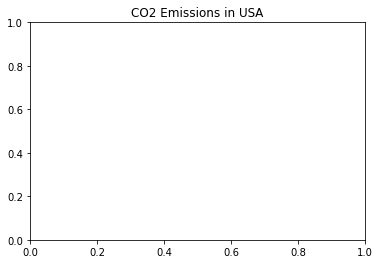

In [8]:
plt.title("CO2 Emissions in USA")

Okay, lets wrap up!

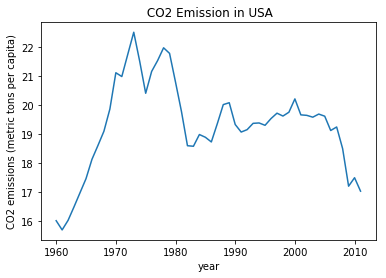

In [9]:
plt.plot(years,co2)
plt.xlabel("year")
plt.ylabel(stage["IndicatorName"].iloc[2])
plt.title(" CO2 Emission in USA")

oooooooooo, its so much better huh LOL

But one this is misleading cuz 1960 its start at 15, lets fix it!

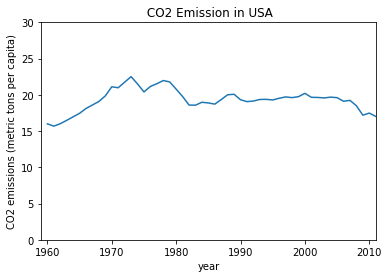

In [10]:
plt.plot(years,co2)
plt.xlabel("year")
plt.ylabel(stage["IndicatorName"].iloc[2])
plt.axis([1959,2011,0,30]) #to make more honest, start they y axis at 0
plt.title(" CO2 Emission in USA")

# Using histograms to explore the distribution of values

We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year

In [11]:
hist_data = stage["Value"].values

In [12]:
len(hist_data)

52

# Histogram data

Now, let's plot those 52 elements using the plot.hist method, which is the call to create a histogram.

I'm passing the method, the India ray, then 10 for the number of bins.

Then I'm setting the norm to be false.

To make sure it doesn't scale the data.

And then, I'm setting the color to be green.

Then, I'll label the axes and label the plot.

<function matplotlib.pyplot.show>

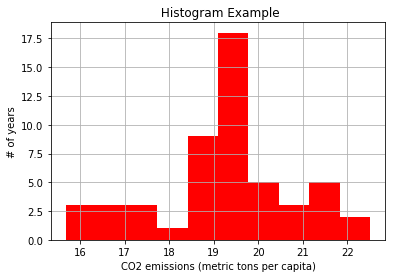

In [13]:
plt.hist(hist_data,10, normed=False, facecolor="red")

plt.ylabel("# of years")
plt.xlabel(stage["IndicatorName"].iloc[2])
plt.title(" Histogram Example")

# add in the grids
plt.grid(True)
plt.show

So the USA has many years where it produced between 19-20 metric tons per capita with outlier on eithe side

# But how do the USA's numbers relate to those of other countries

I'll ask for the data where the indicator is the CO2 emissions per capita, and the year is 2011.

That should give me all the countries that gave us data over that time window.

In [14]:
# select CO2 emissions for all countries in 2011
hist_indicator = "CO2 emissions \(metric"
hist_year= 2011

maks1 = data["IndicatorName"].str.contains(hist_indicator)
mask2= data["Year"].isin([hist_year])  #Notice this!!!

#Apply our mask

co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


Return boolean DataFrame showing whether each element in the DataFrame is contained in values.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html

------------------------------------------------------------------------------

Nice, it looks like I got back what we wanted.

We have different countries and their CO2 emissions per capita in 2011.

Okay, lets check how many countries that we have here

In [15]:
len(co2_2011)

232

Okay we got 232 contries

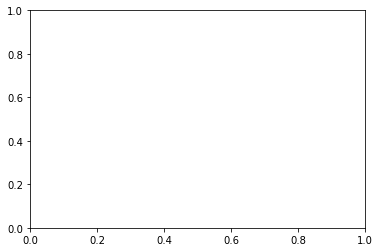

In [16]:
# subplots returns a touple with the figure, axis attributes
fig ,ax = plt.subplots()

Calling plt.subplots gives me back the figure and the axis separately.

<function matplotlib.pyplot.show>

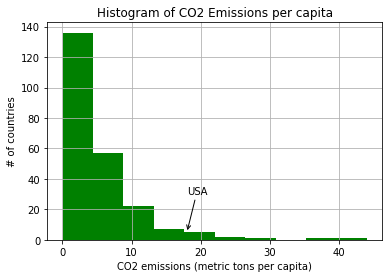

In [18]:
fig ,ax = plt.subplots()
ax.annotate("USA", 
            xy=(18,5), xycoords="data",
            xytext=(18,30), textcoords="data",
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.hist(co2_2011["Value"],10, normed=False, facecolor="green")
      
plt.xlabel(stage["IndicatorName"].iloc[0])
plt.ylabel("# of countries")
plt.title("Histogram of CO2 Emissions per capita")
            
#plt.axis([10,22,0,14])
plt.grid(True)
plt.show

More info about annotations_intro

https://matplotlib.org/users/annotations_intro.html


In [1]:
import numpy as np
np.unique([1,1,3,4,2,3,3])

array([1, 2, 3, 4])